# **Introduction**

In this notebook, we implement the K-Nearest Neighbors (KNN) algorithm from scratch to address the problem of detecting cheating behavior during online examinations. Given the challenges of safeguarding academic integrity in online learning, this classification model aims to identify instances of potential cheating based on input features. To demonstrate the practical application of our model, we have developed an interactive web application available at [https://cheating-detection-demo.vercel.app/](https://cheating-detection-demo.vercel.app/), with the complete source code available on [GitHub](https://github.com/rgestudillo/cheating-detection-demo/).

![Cheating Detection](https://github.com/rgestudillo/cheating-detection-demo/blob/main/image.png?raw=true)

## **Web Application Demo**
The demonstration website showcases our KNN model in a real-world scenario, featuring:
- A 25-question multiple-choice quiz interface
- Real-time monitoring of behavioral features:
  - Browser tab switching
  - Time spent per question
  - Keyboard activity
  - Mouse movements
  - Face proximity detection via webcam
  - Inactivity periods
  - Window switching patterns
- Live analysis and instant feedback on potential cheating behavior
- Score calculation and result visualization

## **Technical Implementation**
The project is built using modern web technologies:
- **Frontend**: Next.js, TypeScript, and Tailwind CSS
- **Backend**: FastAPI and Python
- **Machine Learning**: Custom KNN implementation using NumPy
- **Development**: Full source code available on GitHub with proper version control

## **Objective**
The main objective is to classify students into two categories:
1. **Cheating Detected (Class 1):** Strong evidence of cheating behavior is identified.
2. **No Cheating Detected (Class 0):** No indications of cheating are observed.

## **Key Steps**
1. **Preprocessing**:
   - Load the dataset and normalize the features manually to ensure all input features are on the same scale.
   - Split the dataset into training and testing sets (80%-20% split).

2. **KNN Implementation**:
   - Implement distance functions (Manhattan, Euclidean, Supremum) from scratch.
   - Use these distance metrics in the KNN algorithm to classify test data points based on their closest neighbors in the training set.

3. **Performance Evaluation**:
   - Evaluate the KNN model using several metrics:
     - **Accuracy**
     - **Precision**
     - **Recall**
     - **F1-Score**
   - Analyze the performance of different distance metrics to determine the most effective for the task.

4. **Visualization**:
   - Generate bar plots to compare the performance of distance metrics for each evaluation metric.

5. **Web Implementation**:
   - Develop a full-stack web application using:
     - Next.js and TypeScript for the frontend
     - FastAPI and Python for the backend
     - Real-time webcam monitoring using browser APIs
     - Interactive UI for quiz-taking and result display

---

This project combines theoretical implementation with practical application, providing both a detailed notebook implementation and a live demonstration website. The web application serves as a proof of concept, showing how machine learning models can be integrated into real-world applications for academic integrity monitoring. The complete source code is available for review and contribution on our GitHub repository.

# **Step 1: Import Necessary Libraries**

In [ ]:
!pip install numpy pandas matplotlib

In [3]:
# Import only essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# **Step 2: Preprocess Data**

## **Dataset Features**

The dataset contains the following features, which are used to detect potential cheating during online examinations:


1. **Number of BrowserTabs_Open**  
   Total number of browser tabs open during the online session.  
   - **Unit**: Count.

2. **Time Per Question**  
   Average time spent per question.  
   - **Unit**: Minutes (min).

3. **Keyboard Activity**  
   Total number of key presses recorded during the session.  
   - **Unit**: Keypresses per minute (kpm).

4. **Mouse Movements or Clicks**  
    Sum of mouse button clicks (left, right, middle) and average clicks per minute during the session.  
   - **Unit**: Clicks per minute (cpm).

5. **Proximity Alerts**  
    Number of times another person or face is detected in the webcam feed, indicating potential collaboration or distractions.  
   - **Unit**: Count.

6. **Inactivity Periods**  
   Total time during the session with no detectable activity, such as keyboard or mouse input.  
   - **Unit**: Seconds (s).

7. **Window Focus or Switching**  
   Number of times the user navigates away from the examination window.  
   - **Unit**: Switch count.

   



## **Normalization**
- All features (except the target variable) are normalized to a range of [0, 1] to ensure uniform scaling and prevent any feature from dominating due to its scale.

In [5]:
# Load the dataset from the specified path
file_path = 'dataset.csv'

# Load your dataset
data = pd.read_csv(file_path)

# Normalize the data
def normalize(data):
    """Normalize features to the range [0, 1]."""
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# The last column is the target variable
original_features = data.iloc[:, :-1].values  # Keep the original features unchanged
labels = data.iloc[:, -1].values  # Last column for labels

# Normalize the features
features = normalize(original_features)


# Convert both original and normalized features back to DataFrames
original_features_df = pd.DataFrame(original_features, columns=data.columns[:-1])
normalized_features_df = pd.DataFrame(features, columns=data.columns[:-1])



### (Optional) Plot boxplot for normalized features

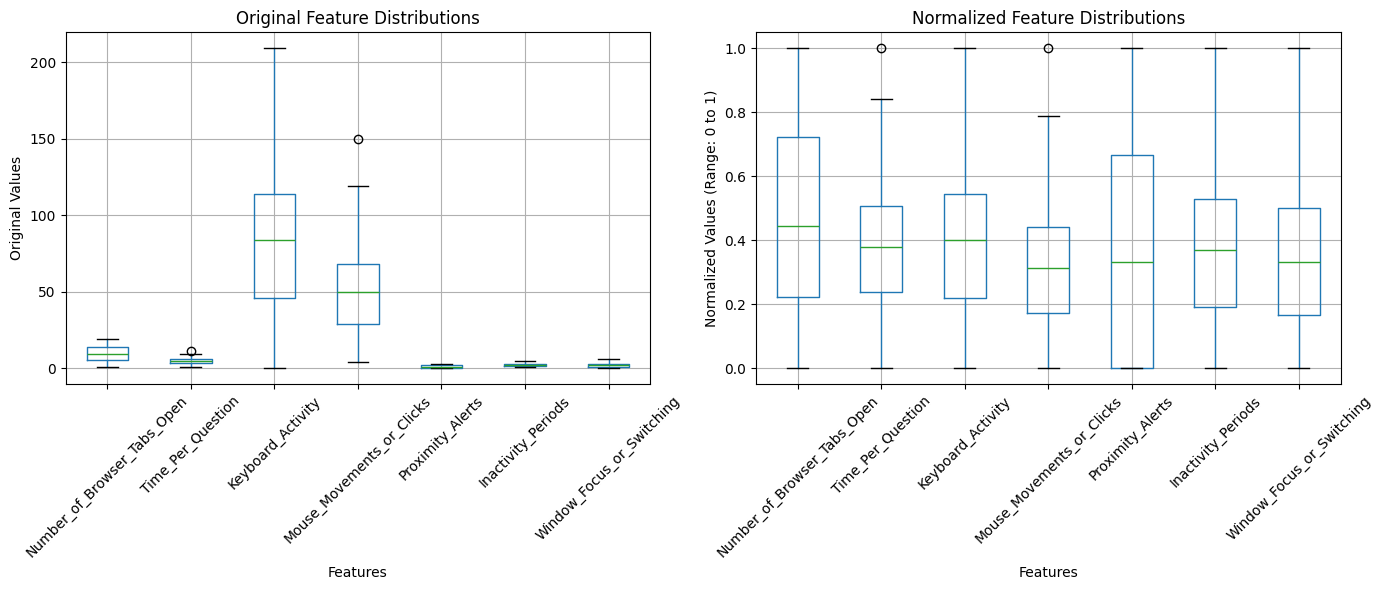

In [6]:
# Create side-by-side boxplots
plt.figure(figsize=(14, 6))

# Original dataset boxplot
plt.subplot(1, 2, 1)
original_features_df.boxplot()
plt.title("Original Feature Distributions")
plt.xlabel("Features")
plt.ylabel("Original Values")
plt.xticks(rotation=45)

# Normalized dataset boxplot
plt.subplot(1, 2, 2)
normalized_features_df.boxplot()
plt.title("Normalized Feature Distributions")
plt.xlabel("Features")
plt.ylabel("Normalized Values (Range: 0 to 1)")
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# **Step 3: Split Dataset**

In [8]:
# Manually split the dataset into training (80%) and testing (20%) sets
def split_data(features, labels, train_ratio=0.8):
    """Split features and labels into training and testing sets."""
    np.random.seed(42)  # For reproducibility
    indices = np.arange(len(features))
    np.random.shuffle(indices)

    split_idx = int(len(features) * train_ratio)
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    return features[train_idx], features[test_idx], labels[train_idx], labels[test_idx]

X_train, X_test, y_train, y_test = split_data(features, labels)

# Print dataset sizes
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


Training set size: 160, Testing set size: 40


# **Step 4: Implement Distance Functions**

In the K-Nearest Neighbors (KNN) algorithm, different distance metrics can be used to measure the similarity between data points. Below are the explanations for the implemented distance metrics:

### **1. Manhattan Distance**
- **Definition**: Also known as the "L1 norm" or "taxicab distance," Manhattan distance measures the total absolute difference across all dimensions between two points.
- **Formula**:
$$
\text{Manhattan Distance} = \sum_{i=1}^{n} |p1_i - p2_i|
$$

- **Example Use Case**: Useful in scenarios where movement is restricted to horizontal and vertical paths, such as grid-based maps or pathfinding in city-like environments.

---




### **2. Euclidean Distance**
- **Definition**: Known as the "L2 norm," Euclidean distance is the straight-line distance between two points in multi-dimensional space. It is derived from the Pythagorean theorem.
- **Formula**:
  $$
  \text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (p1_i - p2_i)^2}
  $$
- **Example Use Case**: Commonly used when the shortest direct distance is required, such as in clustering or geometry.

---

### **3. Supremum Distance**
- **Definition**: Supremum distance measures the maximum absolute difference across all dimensions between two points. It is also referred to as "L∞ norm."
- **Formula**:
  $$
  \text{Supremum Distance} = \max_{i=1}^{n} |p1_i - p2_i|
  $$
- **Example Use Case**: Useful in chessboard scenarios where the maximum step size determines the distance (e.g., the movement of a king in chess).

In [9]:
# Implement Manhattan, Euclidean, and Supremum distances
def manhattan_distance(p1, p2):
    """Calculate Manhattan distance."""
    return np.sum(np.abs(p1 - p2))

def euclidean_distance(p1, p2):
    """Calculate Euclidean distance."""
    return np.sqrt(np.sum((p1 - p2) ** 2))

def supremum_distance(p1, p2):
    """Calculate Supremum (Chebyshev) distance."""
    return np.max(np.abs(p1 - p2))


# **Step 5: Implement KNN Algorithm**

- Write a function to calculate distances between points using:
  - Manhattan Distance
  - Euclidean Distance
  - Supremum Distance

- Write a function that implements the KNN algorithm (as discussed in our lecture).

In [10]:
k = 5  # Step 1: Number of neighbors
def knn_predict(X_train, y_train, X_test, k, distance_metric):
    """KNN prediction from scratch."""
    predictions = []

    for test_point in X_test:
        # Step 2: Compute the distance of the test point to all training points
        distances = [distance_metric(test_point, train_point) for train_point in X_train]

        # Step 3: Sort the distances and get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:k]

        # Step 4: Get the labels of the k nearest neighbors
        k_labels = y_train[k_indices]

        # Step 5: Assign the majority class of the k nearest neighbors
        unique, counts = np.unique(k_labels, return_counts=True)
        predictions.append(unique[np.argmax(counts)])

    return np.array(predictions)


### (Optional) Visualization of K-Nearest Neighbors

This visualization demonstrates the KNN classification process step-by-step:

1. **Training Points**: All training points are plotted, with unique colors representing different classes.
2. **Test Point**: The test point being classified is highlighted (e.g., black "X").
3. **Nearest Neighbors**: Lines connect the test point to its k-nearest neighbors, identified using a distance metric (e.g., Euclidean distance).
4. **Majority Vote**: The test point is assigned the class with the highest vote among the neighbors.

#### Features:
- Configurable parameters (e.g., *k*, distance metric).
- Clear and intuitive visualization of the decision-making process.

#### Limitations:
- Works directly with 2D features; higher dimensions require reduction (e.g., PCA).
- Computationally intensive for large datasets due to distance calculations.

This approach is ideal for educational purposes, debugging, and presentations to illustrate the KNN algorithm.


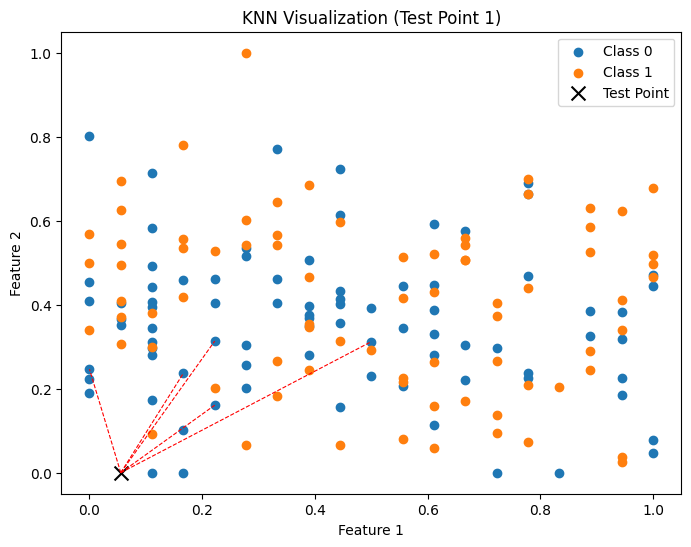

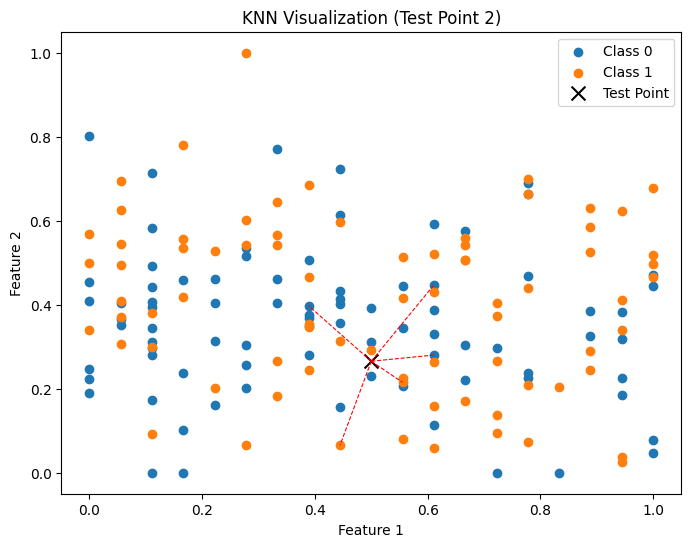

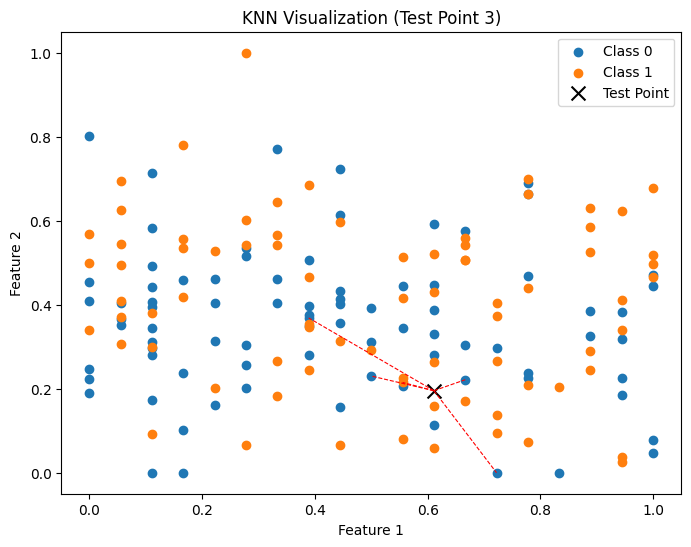

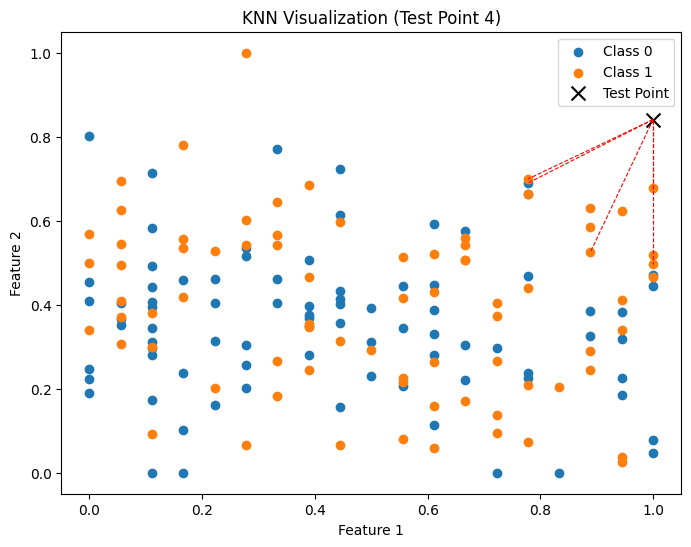

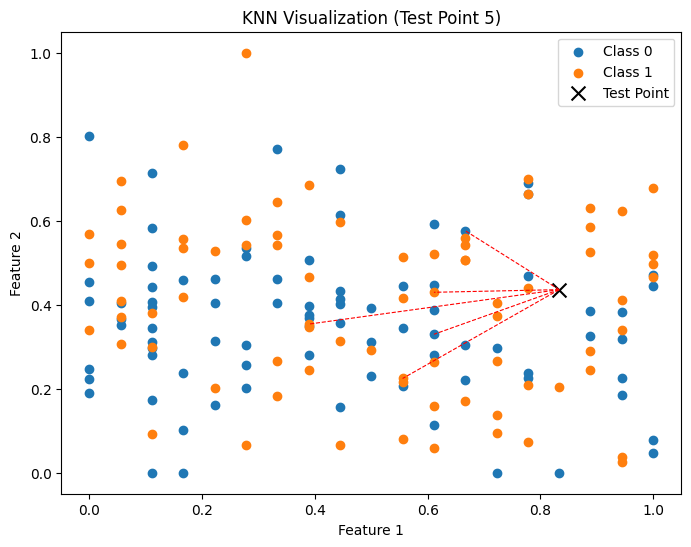

array([0, 0, 0, 1, 1])

In [11]:
def knn_predict_with_visualization(X_train, y_train, X_test, k, distance_metric):
    """KNN prediction from scratch with visualization."""
    predictions = []

    for test_idx, test_point in enumerate(X_test):
        # Stop visualization after the first 5 test points
        if test_idx >= 5:
            break

        # Step 2: Compute the distance of the test point to all training points
        distances = [distance_metric(test_point, train_point) for train_point in X_train]

        # Step 3: Sort the distances and get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:k]

        # Step 4: Get the labels of the k nearest neighbors
        k_labels = y_train[k_indices]

        # Step 5: Assign the majority class of the k nearest neighbors
        unique, counts = np.unique(k_labels, return_counts=True)
        prediction = unique[np.argmax(counts)]
        predictions.append(prediction)

        # Visualization of the process
        plt.figure(figsize=(8, 6))

        # Plot all training points
        for label in np.unique(y_train):
            plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], label=f"Class {label}")

        # Highlight the test point
        plt.scatter(test_point[0], test_point[1], color='black', label='Test Point', marker='x', s=100)

        # Highlight the k nearest neighbors
        for idx in k_indices:
            plt.plot([test_point[0], X_train[idx, 0]], [test_point[1], X_train[idx, 1]], color='red', linestyle='--', linewidth=0.8)

        plt.title(f"KNN Visualization (Test Point {test_idx + 1})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

    return np.array(predictions)


knn_predict_with_visualization(X_train, y_train, X_test, k, distance_metric=euclidean_distance)


# **Step 6: Evaluate the Model**

In [12]:
# Predict with the KNN model
predictions = knn_predict(X_train, y_train, X_test, k, distance_metric=euclidean_distance)
# Print the predictions
print("Predictions:", predictions)
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")


Predictions: [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 0 0]
KNN Accuracy: 67.50%


# **Step 7: Analyze Result**
Analyze how each distance metric affects KNN performance using accuracy (you may include additional metrics such as precision or recall, as needed).



In [13]:
# Initialize a dictionary to store all performance metrics for each distance metric
metrics = {'Manhattan': manhattan_distance,
           'Euclidean': euclidean_distance,
           'Supremum': supremum_distance}

# Initialize results dictionary with all metrics for each distance metric
results = {}
for name in metrics.keys():
    results[name] = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0}

# Calculate metrics for each distance metric
for name, metric in metrics.items():
    preds = knn_predict(X_train, y_train, X_test, k, distance_metric=metric)

    # Accuracy
    accuracy = np.mean(preds == y_test)

    # Precision, Recall, F1 Score (manual calculation)
    tp = np.sum((preds == 1) & (y_test == 1))  # True positives
    fp = np.sum((preds == 1) & (y_test == 0))  # False positives
    fn = np.sum((preds == 0) & (y_test == 1))  # False negatives

    # Avoid division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store metrics in the results dictionary
    results[name]['accuracy'] = accuracy
    results[name]['precision'] = precision
    results[name]['recall'] = recall
    results[name]['f1_score'] = f1_score


# Print the results dictionary
print("Results Dictionary:")
for name1, metrics1 in results.items():
    print(f"\nDistance Metric: {name1}")
    print(f"  Accuracy: {metrics1['accuracy'] * 100:.2f}%")
    print(f"  Precision: {metrics1['precision']:.2f}")
    print(f"  Recall: {metrics1['recall']:.2f}")
    print(f"  F1-Score: {metrics1['f1_score']:.2f}")


Results Dictionary:

Distance Metric: Manhattan
  Accuracy: 67.50%
  Precision: 0.80
  Recall: 0.55
  F1-Score: 0.65

Distance Metric: Euclidean
  Accuracy: 67.50%
  Precision: 0.76
  Recall: 0.59
  F1-Score: 0.67

Distance Metric: Supremum
  Accuracy: 57.50%
  Precision: 0.62
  Recall: 0.59
  F1-Score: 0.60


# **Step 8: Visualize Results**
Create plots/charts to compare model performance.

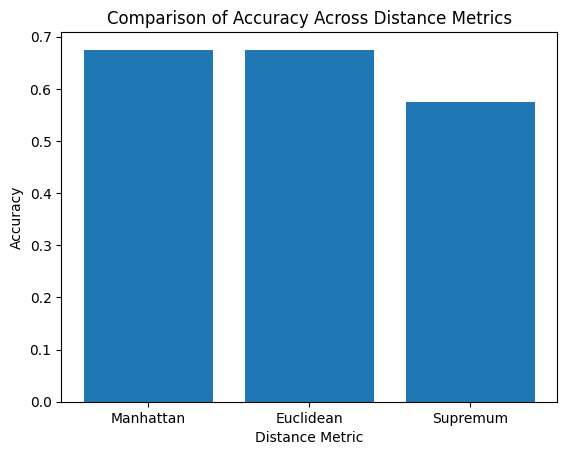

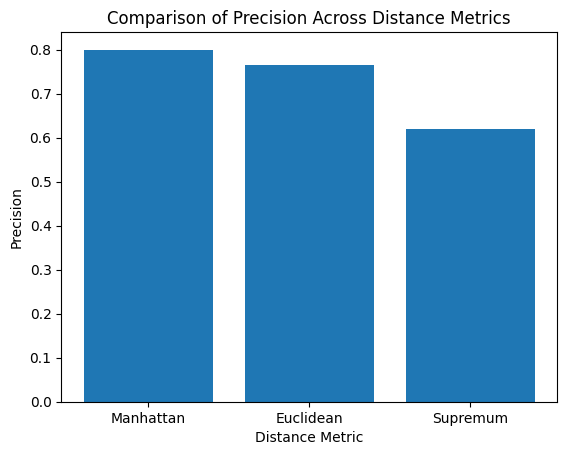

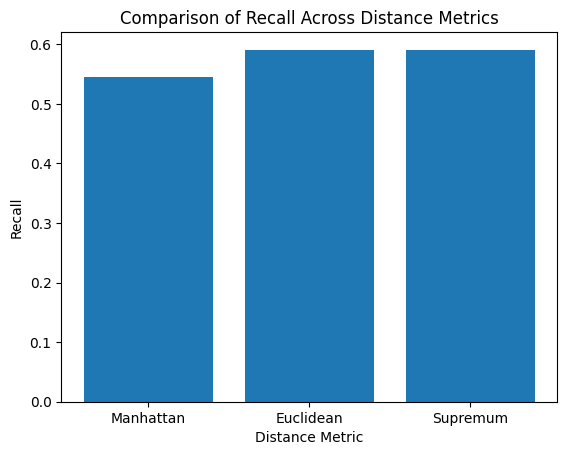

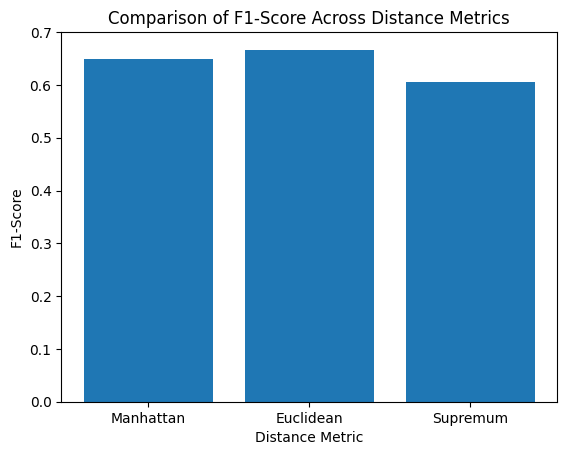

In [14]:
# Visualize results
# Extracting metrics for visualization
metric_names = list(metrics.keys())
accuracies = [results[name]['accuracy'] for name in metric_names]
precisions = [results[name]['precision'] for name in metric_names]
recalls = [results[name]['recall'] for name in metric_names]
f1_scores = [results[name]['f1_score'] for name in metric_names]

# Plot Accuracy
plt.bar(metric_names, accuracies)
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Across Distance Metrics')
plt.show()

# Plot Precision
plt.bar(metric_names, precisions)
plt.xlabel('Distance Metric')
plt.ylabel('Precision')
plt.title('Comparison of Precision Across Distance Metrics')
plt.show()

# Plot Recall
plt.bar(metric_names, recalls)
plt.xlabel('Distance Metric')
plt.ylabel('Recall')
plt.title('Comparison of Recall Across Distance Metrics')
plt.show()

# Plot F1-Score
plt.bar(metric_names, f1_scores)
plt.xlabel('Distance Metric')
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Score Across Distance Metrics')
plt.show()


### Results Analysis for KNN with Different Distance Metrics

The KNN algorithm was evaluated using three distance metrics: **Manhattan**, **Euclidean**, and **Supremum**. Below is an analysis of the results:

#### Manhattan Distance:
- **Accuracy**: 67.50%
- **Precision**: 0.80
- **Recall**: 0.55
- **F1-Score**: 0.65
- **Explanation**:
  - Manhattan distance sums the absolute differences between feature values, making it sensitive to variations in features with large ranges (e.g., `Keyboard_Activity`, `Mouse_Movements_or_Clicks`).
  - It achieved the highest precision (0.80), meaning it is good at predicting true positives (correctly detecting cheating).
  - However, it has a lower recall (0.55), missing some actual cheating cases.

#### Euclidean Distance:
- **Accuracy**: 67.50%
- **Precision**: 0.76
- **Recall**: 0.59
- **F1-Score**: 0.67
- **Explanation**:
  - Euclidean distance squares differences, emphasizing larger differences more than Manhattan.
  - Precision (0.76) is slightly lower than Manhattan, but recall (0.59) is higher, balancing predictions.
  - The F1-score (0.67) indicates better overall performance by balancing precision and recall.

#### Supremum Distance:
- **Accuracy**: 57.50%
- **Precision**: 0.62
- **Recall**: 0.59
- **F1-Score**: 0.60
- **Explanation**:
  - Supremum distance only considers the maximum difference between feature values, ignoring cumulative contributions.
  - It performed poorly because important variations across smaller features were overlooked.

---

### Dataset Characteristics and Impact:
1. **Feature Scales**:
   - Features like `Keyboard_Activity` and `Mouse_Movements_or_Clicks` have large ranges, dominating the distance calculation. Metrics sensitive to these scales perform better.
2. **Class Imbalance**:
   - Slight imbalance in `Cheating_Detected` cases affects recall, as fewer positive cases make it harder to capture all cheating instances.
3. **Feature Importance**:
   - Features such as `Mouse_Movements_or_Clicks` and `Keyboard_Activity` appear highly correlated with cheating. Distance metrics that account for these perform better.

---

### Conclusion:
- **Manhattan Distance** is better for precision-focused tasks where false positives must be minimized.
- **Euclidean Distance** provides better balance between precision and recall, making it more suitable for general applications.
- **Supremum Distance** is not effective for this dataset due to its inability to account for cumulative feature variations.


Export X Train and Y train for api use (Optional)

In [20]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)